In [1]:
import pandas as pd
import numpy as np
import sqlite3
import matplotlib.pyplot as plt

In [2]:
ADD_C_CYSTEINE_DA = 57.021464  # from Unimod.org
PROTON_MASS = 1.007276

In [3]:
MAXIMUM_Q_VALUE = 0.01

#### prepare MQ results

In [4]:
experiment_name_ek = 'test-ek'
EK_PERCOLATOR_OUTPUT_DIR = '/Users/darylwilding-mcbride/Downloads/experiments/{}/percolator-output'.format(experiment_name_ek)
EK_PERCOLATOR_OUTPUT_FILE_NAME = "{}/{}.percolator.target.psms.txt".format(EK_PERCOLATOR_OUTPUT_DIR, experiment_name_ek)

In [5]:
# read the percolator identifications and throw away the poor quality ones
psms_ek_df = pd.read_csv(EK_PERCOLATOR_OUTPUT_FILE_NAME, sep='\t')
psms_ek_df = psms_ek_df[psms_ek_df['percolator q-value'] <= MAXIMUM_Q_VALUE]
psms_ek_df = psms_ek_df[psms_ek_df['peptide mass'] > 0.0]

In [6]:
psms_ek_df['peptide_mass_modification'] = psms_ek_df.apply(lambda row: row['peptide mass'] + (row.sequence.count('C') * ADD_C_CYSTEINE_DA), axis=1)
psms_ek_df['peptide_mass_difference'] = abs((psms_ek_df['spectrum neutral mass'] + PROTON_MASS) - psms_ek_df['peptide_mass_modification'])
psms_ek_df['mass_error_ppm'] = (abs(psms_ek_df['peptide_mass_difference']) / psms_ek_df['peptide_mass_modification']) * 1e6


In [7]:
psms_ek_df['run_name'] = psms_ek_df.apply(lambda row: 'YHE114_01' if row.file_idx == 0 else 'YHE211_01', axis=1)

In [8]:
psms_ek_df.sample(n=5)

,file_idx,scan,charge,spectrum precursor m/z,spectrum neutral mass,peptide mass,percolator score,percolator q-value,percolator PEP,total matches/spectrum,sequence,protein id,flanking aa,peptide_mass_modification,peptide_mass_difference,mass_error_ppm,run_name
6801,0,9484,2,775.9074,1549.8003,1550.8092,0.918163,0.000069,0.000032,5518.64,IAGAALDVYPHEPAK,"sp|P40054|SERA_YEAST,sp|P40510|SER33_YEAST",KN,1550.8092,0.001624,1.047195,YHE114_01
15703,1,2311,1,1117.5736,1116.5663,1117.5768,0.449087,0.000183,0.003728,5518.64,SADTLWGIQK,sp|P00338|LDHA_HUMAN,KE,1117.5768,0.003224,2.884813,YHE211_01
2733,0,14180,2,889.4723,1776.9300,1777.9403,1.230600,0.000069,0.000001,5518.64,HSQFIGYPITLFVEK,"sp|P07900|HS90A_HUMAN,sp|Q58FG0|HS905_HUMAN",KE,1777.9403,0.003024,1.700845,YHE114_01
12190,0,27632,3,892.4395,2674.2965,2675.3118,0.630863,0.000069,0.000591,5518.64,FFEEVLLFEDELHDHGVSSLSVK,sp|O75663|TIPRL_HUMAN,KI,2675.3118,0.008024,2.999277,YHE114_01
18583,1,8556,2,755.8541,1509.6937,1510.7052,0.270979,0.000533,0.022216,5518.64,EDRFENNELFAK,sp|O60610|DIAP1_HUMAN,KL,1510.7052,0.004224,2.796045,YHE211_01


In [9]:
yhe114_01_ek_df = psms_ek_df[psms_ek_df.run_name == 'YHE114_01'].copy()
yhe114_01_ek_df.sort_values(by=['mass_error_ppm'], ascending=True, inplace=True)
yhe114_01_ek_df.drop_duplicates(subset=['sequence', 'charge'], keep='first', inplace=True)

#### prepare TFD/E results

In [10]:
experiment_name_dwm = 'test-dwm'
DWM_PERCOLATOR_OUTPUT_DIR = '/Users/darylwilding-mcbride/Downloads/experiments/{}/percolator-output'.format(experiment_name_dwm)
DWM_PERCOLATOR_OUTPUT_FILE_NAME = "{}/{}.percolator.target.psms.txt".format(DWM_PERCOLATOR_OUTPUT_DIR, experiment_name_dwm)

In [11]:
# read the percolator identifications and throw away the poor quality ones
psms_dwm_df = pd.read_csv(DWM_PERCOLATOR_OUTPUT_FILE_NAME, sep='\t')
psms_dwm_df = psms_dwm_df[psms_dwm_df['percolator q-value'] <= MAXIMUM_Q_VALUE]
psms_dwm_df = psms_dwm_df[psms_dwm_df['peptide mass'] > 0.0]

In [12]:
psms_dwm_df['peptide_mass_modification'] = psms_dwm_df.apply(lambda row: row['peptide mass'] + (row.sequence.count('C') * ADD_C_CYSTEINE_DA), axis=1)
psms_dwm_df['peptide_mass_difference'] = abs((psms_dwm_df['spectrum neutral mass'] + PROTON_MASS) - psms_dwm_df['peptide_mass_modification'])
psms_dwm_df['mass_error_ppm'] = (abs(psms_dwm_df['peptide_mass_difference']) / psms_dwm_df['peptide_mass_modification']) * 1e6

In [13]:
psms_dwm_df['run_name'] = psms_dwm_df.apply(lambda row: 'YHE114_01' if row.file_idx == 0 else 'YHE211_01', axis=1)

In [14]:
yhe114_01_dwm_df = psms_dwm_df[psms_dwm_df.run_name == 'YHE114_01'].copy()
yhe114_01_dwm_df.sort_values(by=['mass_error_ppm'], ascending=True, inplace=True)
yhe114_01_dwm_df.drop_duplicates(subset=['sequence', 'charge'], keep='first', inplace=True)

#### merge the two result sets

In [15]:
len(yhe114_01_ek_df), len(yhe114_01_dwm_df)

(11874, 10201)

In [16]:
merged_df = pd.merge(yhe114_01_ek_df, yhe114_01_dwm_df, how='outer', left_on=['sequence', 'charge'], right_on=['sequence', 'charge'], suffixes=['_mq','_tfde'])

In [17]:
merged_df.sample(n=5)

,file_idx_mq,scan_mq,charge,spectrum precursor m/z_mq,spectrum neutral mass_mq,peptide mass_mq,percolator score_mq,percolator q-value_mq,percolator PEP_mq,total matches/spectrum_mq,...,percolator score_tfde,percolator q-value_tfde,percolator PEP_tfde,total matches/spectrum_tfde,protein id_tfde,flanking aa_tfde,peptide_mass_modification_tfde,peptide_mass_difference_tfde,mass_error_ppm_tfde,run_name_tfde
11439,0.0,9079.0,2,765.3847,1528.7549,1529.7685,0.400964,0.000230,0.006058,5518.64,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3820,0.0,5021.0,2,648.3809,1294.7473,1295.7561,0.926476,0.000069,0.000029,5518.64,...,1.054052,0.000042,0.000002,1385.65,"sp|P02407|RS17A_YEAST,sp|P14127|RS17B_YEAST",KD,1295.7561,0.004124,3.182698,YHE114_01
10431,0.0,26590.0,3,847.7631,2540.2675,2541.2838,0.844110,0.000069,0.000068,5518.64,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4502,0.0,4374.0,2,625.3361,1248.6576,1249.6666,0.606186,0.000069,0.000759,5518.64,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2662,0.0,13267.0,2,868.9522,1735.8898,1736.8985,0.899244,0.000069,0.000039,5518.64,...,0.635136,0.000042,0.000210,1385.65,sp|Q9Y312|AAR2_HUMAN,KL,1736.8985,0.005324,3.065234,YHE114_01


In [18]:
mq_only_df = merged_df[(merged_df.file_idx_mq == 0) & (merged_df.file_idx_tfde.isnull())].copy()
tfde_only_df = merged_df[(merged_df.file_idx_mq.isnull()) & (merged_df.file_idx_tfde == 0)].copy()
both_df = merged_df[(merged_df.file_idx_mq == 0) & (merged_df.file_idx_tfde == 0)]

In [19]:
len(both_df), len(mq_only_df), len(tfde_only_df)

(7165, 4709, 3036)

In [20]:
mq_only_df['percolator score_tfde'] = mq_only_df['percolator score_tfde'].fillna(0)
tfde_only_df['percolator score_mq'] = tfde_only_df['percolator score_mq'].fillna(0)

In [21]:
linear_df = pd.DataFrame([(0.0,0.0),(3.0,3.0)], columns=['mq','tfde'])

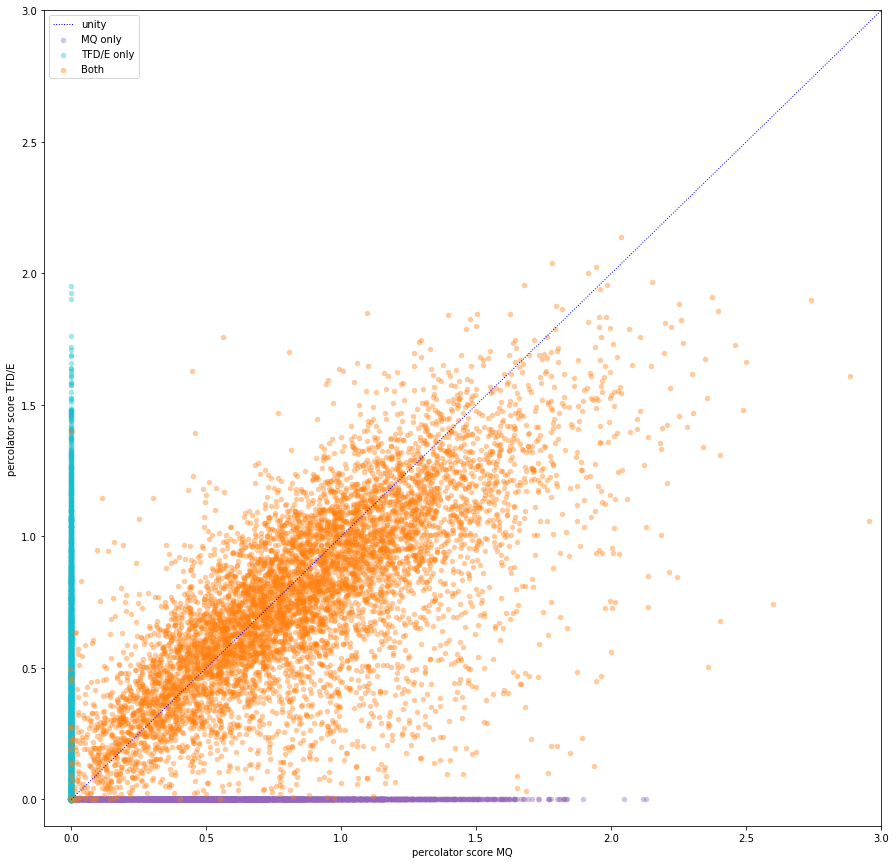

In [22]:
f, ax = plt.subplots()
f.set_figheight(15)
f.set_figwidth(15)
plt.margins(0.06)

ax.scatter(mq_only_df['percolator score_mq'], mq_only_df['percolator score_tfde'], marker='o', color='tab:purple', lw=0, s=30, alpha=0.4, label='MQ only')
ax.scatter(tfde_only_df['percolator score_mq'], tfde_only_df['percolator score_tfde'], marker='o', color='tab:cyan', lw=0, s=30, alpha=0.4, label='TFD/E only')
ax.scatter(both_df['percolator score_mq'], both_df['percolator score_tfde'], marker='o', color='tab:orange', lw=0, s=30, alpha=0.4, label='Both')

ax.plot(linear_df.mq, linear_df.tfde, marker='', color='blue', linestyle=':', linewidth=1, ms=5, label='unity')

plt.legend(loc='best')
plt.xlabel('percolator score MQ')
plt.ylabel('percolator score TFD/E')

plt.xlim((-0.1,3))
plt.ylim((-0.1,3))

plt.show()

#### plot ppm error

In [23]:
mq_only_df['mass_error_ppm_tfde'] = mq_only_df['mass_error_ppm_tfde'].fillna(0)
tfde_only_df['mass_error_ppm_mq'] = tfde_only_df['mass_error_ppm_mq'].fillna(0)

In [24]:
min_coord = min(both_df['mass_error_ppm_mq'].min(), both_df['mass_error_ppm_tfde'].min(), mq_only_df['mass_error_ppm_mq'].min(), tfde_only_df['mass_error_ppm_tfde'].min())
max_coord = max(both_df['mass_error_ppm_mq'].max(), both_df['mass_error_ppm_tfde'].max(), mq_only_df['mass_error_ppm_mq'].max(), tfde_only_df['mass_error_ppm_tfde'].max())
linear_df = pd.DataFrame([(min_coord,min_coord),(max_coord,max_coord)], columns=['mq','tfde'])

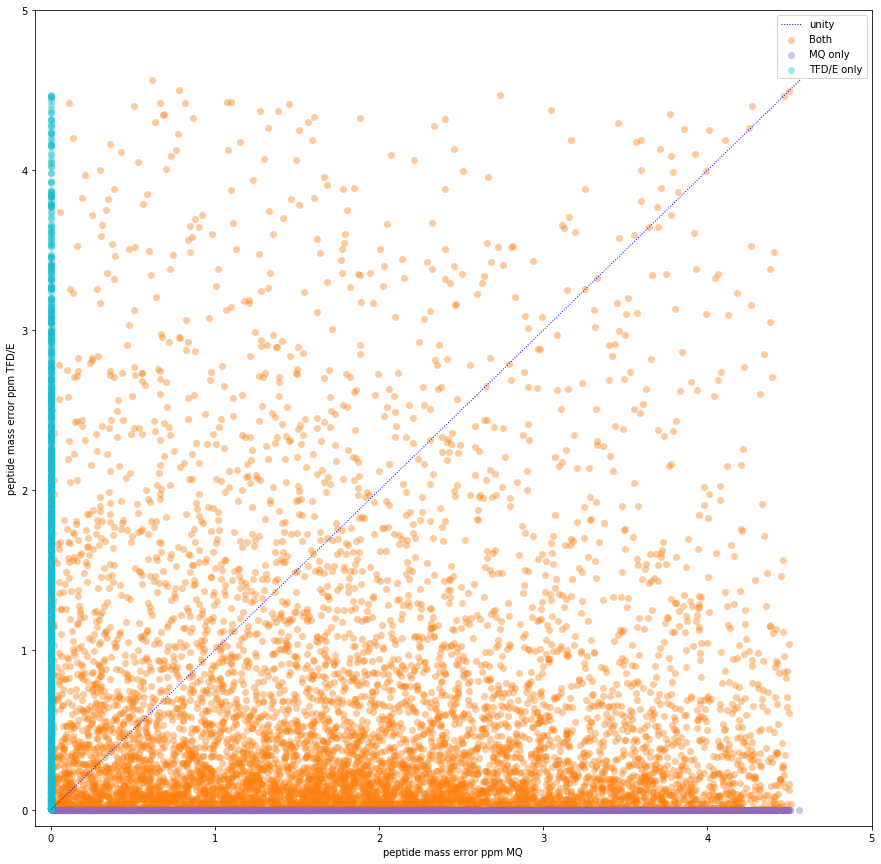

In [33]:
f, ax = plt.subplots()
f.set_figheight(15)
f.set_figwidth(15)
plt.margins(0.06)

ax.scatter(both_df['mass_error_ppm_mq'], both_df['mass_error_ppm_tfde'], marker='o', color='tab:orange', lw=0, s=50, alpha=0.4, label='Both')
ax.scatter(mq_only_df['mass_error_ppm_mq'], mq_only_df['mass_error_ppm_tfde'], marker='o', color='tab:purple', lw=0, s=50, alpha=0.4, label='MQ only')
ax.scatter(tfde_only_df['mass_error_ppm_mq'], tfde_only_df['mass_error_ppm_tfde'], marker='o', color='tab:cyan', lw=0, s=50, alpha=0.4, label='TFD/E only')

ax.plot(linear_df.mq, linear_df.tfde, marker='', color='blue', linestyle=':', linewidth=1, ms=5, label='unity')

plt.legend(loc='best')
plt.xlabel('peptide mass error ppm MQ')
plt.ylabel('peptide mass error ppm TFD/E')

plt.xlim((-0.1,5))
plt.ylim((-0.1,5))

plt.show()

In [31]:
mq_only_df['mass_error_ppm_mq'].max()

4.560549956259937

In [32]:
tfde_only_df['mass_error_ppm_tfde'].max()

4.468253419055178